In [1]:
import requests

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

In [5]:
import pendulum

## Life expectancy

In [6]:
url = "https://docs.google.com/spreadsheets/d/1RehxZjXd7_rG8v2pJYV6aY0J3LAsgUPDQnbY4dRdiSs/export?format=xlsx"

In [7]:
response = requests.get(url)
with open('/tmp/temp_life_expectancy.xlsx', 'wb') as f:
    f.write(response.content)

In [8]:
xls = pd.ExcelFile('/tmp/temp_life_expectancy.xlsx')

In [9]:
dfs = {sheet_name: pd.read_excel(xls, sheet_name) for sheet_name in xls.sheet_names}

In [10]:
dfs.keys()

dict_keys(['ABOUT', 'data-for-world-by-year', 'data-for-regions-by-year', 'data-for-countries-etc-by-year', 'data-notes-and-uncertainty', 'unpivot', 'live unpivot', 'data-lex-in-columns'])

## GDP

In [11]:
url = "https://docs.google.com/spreadsheets/d/1i5AEui3WZNZqh7MQ4AKkJuCz4rRxGR_pw_9gtbcBOqQ/export?format=xlsx"

In [12]:
response = requests.get(url)
with open('/tmp/temp_gdp.xlsx', 'wb') as f:
    f.write(response.content)

In [ ]:
gdp_xls = pd.ExcelFile('/tmp/temp_gdp.xlsx')
gdp_dfs = {sheet_name: pd.read_excel(gdp_xls, sheet_name) for sheet_name in gdp_xls.sheet_names}
gdp_dfs.keys()

### data-for-world-by-year VS GDP

In [14]:
data_for_world_by_year_le_df = dfs['data-for-world-by-year']
print(data_for_world_by_year_le_df.shape)
data_for_world_by_year_le_df.head(10)

(301, 4)


,geo,name,time,Life expectancy
0,world,World,1800,30.641734
1,world,World,1801,30.712394
2,world,World,1802,30.600519
3,world,World,1803,30.277589
4,world,World,1804,30.197492
5,world,World,1805,30.780823
6,world,World,1806,30.790822
7,world,World,1807,30.739852
8,world,World,1808,30.709765
9,world,World,1809,30.732406


In [15]:
data_for_world_by_year_le_df.rename(columns={'Life expectancy ': 'life_expectancy',
                                          'time': 'year',
                                          'name': 'area'},
                                 inplace=True)
data_for_world_by_year_le_df.sample(10)

,geo,area,year,life_expectancy
40,world,World,1840,31.269417
147,world,World,1947,48.152960
77,world,World,1877,30.619167
109,world,World,1909,36.616669
103,world,World,1903,35.637110
74,world,World,1874,32.765589
176,world,World,1976,61.966570
58,world,World,1858,30.277361
71,world,World,1871,31.986712
179,world,World,1979,63.239850


In [16]:
data_for_world_by_year_le_df['life_expectancy'].max(), data_for_world_by_year_le_df['life_expectancy'].min()

(np.float64(83.61751128784078), np.float64(24.544647531771062))

In [17]:
data_for_world_by_year_gdp_df = gdp_dfs['data-for-world-by-year']
print(data_for_world_by_year_gdp_df.shape)
data_for_world_by_year_gdp_df.head(10)

(301, 6)


,geo,name,time,Income per person,GDP total,GDP per capita growth (%)
0,world,World,1800,1521.149042,1495463949050,NaN
1,world,World,1801,1519.369104,1498924942626,-0.12
2,world,World,1802,1520.921848,1505735026471,0.10
3,world,World,1803,1518.414540,1508584702240,-0.16
4,world,World,1804,1518.972352,1514535783170,0.04
5,world,World,1805,1516.843393,1517865798406,-0.14
6,world,World,1806,1516.090824,1522626781422,-0.05
7,world,World,1807,1516.346683,1528463407096,0.02
8,world,World,1808,1509.014395,1526690245305,-0.48
9,world,World,1809,1509.382626,1532747659639,0.02


In [18]:
data_for_world_by_year_gdp_df.rename(columns={'Income per person': 'income_per_person($)',
                                              'time': 'year',
                                              'GDP total': 'gdp_total($)',
                                              'name': 'area'},
                                     inplace=True)
data_for_world_by_year_gdp_df.sample(10)

,geo,area,year,income_per_person($),gdp_total($),GDP per capita growth (%)
213,world,World,2013,14877.260610,107509719795184,1.91
65,world,World,1865,1961.296355,2582399682420,-0.07
141,world,World,1941,4493.474490,10359276170709,2.84
25,world,World,1825,1543.769590,1740358959612,-0.02
64,world,World,1864,1962.760011,2576406706238,1.06
5,world,World,1805,1516.843393,1517865798406,-0.14
292,world,World,2092,38452.750830,398723742503298,0.93
66,world,World,1866,1970.964324,2603232021382,0.49
258,world,World,2058,27651.861140,275636439089414,1.03
183,world,World,1983,9187.511951,42956827348856,0.54


#### merging world's life-expectancy with world's gdp data

In [19]:
data_for_world_by_year_df = pd.merge(left = data_for_world_by_year_le_df,
                                  right = data_for_world_by_year_gdp_df, 
                                  how = 'inner', on = ['geo', 'area', 'year'])
data_for_world_by_year_df.shape, data_for_world_by_year_df.drop_duplicates().shape

((301, 7), (301, 7))

In [20]:
data_for_world_by_year_df

,geo,area,year,life_expectancy,income_per_person($),gdp_total($),GDP per capita growth (%)
0,world,World,1800,30.641734,1521.149042,1495463949050,NaN
1,world,World,1801,30.712394,1519.369104,1498924942626,-0.12
2,world,World,1802,30.600519,1520.921848,1505735026471,0.10
3,world,World,1803,30.277589,1518.414540,1508584702240,-0.16
4,world,World,1804,30.197492,1518.972352,1514535783170,0.04
...,...,...,...,...,...,...,...
296,world,World,2096,83.170480,39883.457610,412499807135761,0.91
297,world,World,2097,83.280416,40245.832910,415899838149848,0.91
298,world,World,2098,83.393080,40609.854400,419277715729475,0.90
299,world,World,2099,83.506378,40975.391930,422634533719577,0.90


In [21]:
years = sorted(data_for_world_by_year_df['year'].unique())

In [22]:
current_year = pendulum.now().add(years=-1).year
current_year

2023

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 8))
camera = Camera(fig)

ax2 = ax1.twinx()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

gdp_x, gdp_y, le_x, le_y = [], [], [], []

for year in years:
    subset = data_for_world_by_year_df[data_for_world_by_year_df['year'] == year]
    gdp_x.append(year)
    gdp_y.append(subset['gdp_total($)'].values[0])
    le_x.append(year)
    le_y.append(subset['life_expectancy'].values[0])

    ax1.plot(gdp_x, gdp_y, color='blue', label='GDP (USD)' if year == years[0] else "", marker='o', linestyle='-' if year <= current_year else '--')
    ax2.plot(le_x, le_y, color='green', label='Life Expectancy (years)' if year == years[0] else "", marker='o', linestyle='-' if year <= current_year else '--')

    # Vertical line to indicate the current year
    if year == current_year:
        plt.axvline(x=year, color='red', linestyle='-', linewidth=2, label='Projection Start')

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total GDP in USD', color='blue')
    ax2.set_ylabel('Life Expectancy', color='green')

    # Formatting for each frame
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.title('Yearly Development: GDP vs Life Expectancy')

    if year == years[0]:
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

    camera.snap()

animation = camera.animate()
animation.save('gm_le_gdp_improved_faster_with_line.gif', writer='imagemagick', fps=12)

MovieWriter imagemagick unavailable; using Pillow instead.


--------

In [10]:
import plotly.express as px

In [15]:
fig = px.scatter(data, 
                 x='time', 
                 y='life_expectancy', 
                 animation_frame='time', 
                 animation_group='name', 
                 # size='Population', 
                 # color='Continent', 
                 hover_name='name', 
                 range_y=[data['life_expectancy'].min(),
                          data['life_expectancy'].max()])
fig.show()

-----

In [17]:
import seaborn as sns

MovieWriter imagemagick unavailable; using Pillow instead.


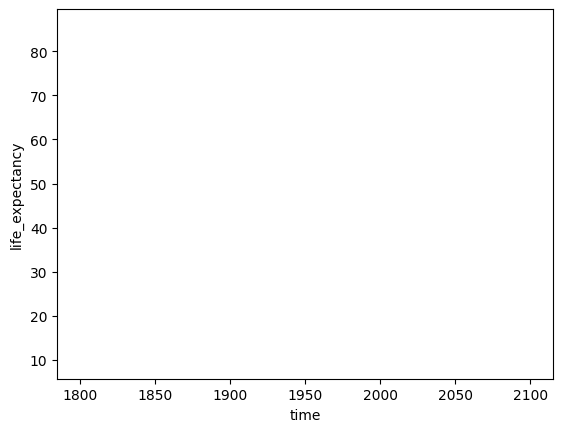

In [19]:
fig, ax = plt.subplots()

def animate(i):
    current = data[data['time'] == data['time'].unique()[i]]
    sns.lineplot(x='time', y='life_expectancy', data=current, ax=ax, color='blue')

ani = FuncAnimation(fig, animate, frames=len(data['time'].unique()))
ani.save('seaborn_life_expectancy.gif', writer='imagemagick')


----

In [20]:
from celluloid import Camera

In [21]:
data.time.min(), data.time.max()

(np.int64(1800), np.int64(2100))

MovieWriter imagemagick unavailable; using Pillow instead.


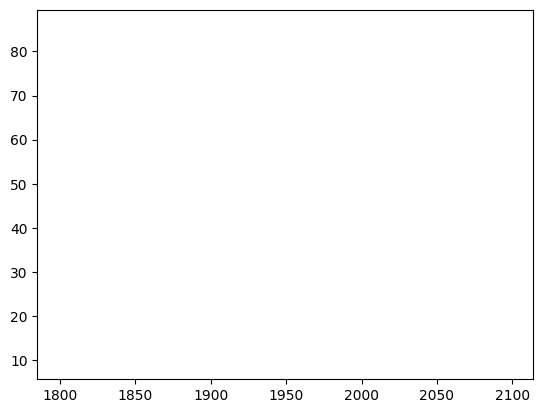

In [22]:
fig = plt.figure()
camera = Camera(fig)
for i in range(1800, 2100):
    current_data = data[data['time'] == i]
    plt.scatter(current_data['time'], current_data['life_expectancy'], c='red')
    camera.snap()
animation = camera.animate()
animation.save('gdp_vs_life_expectancy.gif', writer='imagemagick')